# Week 4

In [95]:
print("det bliver mega godt")

det bliver mega godt


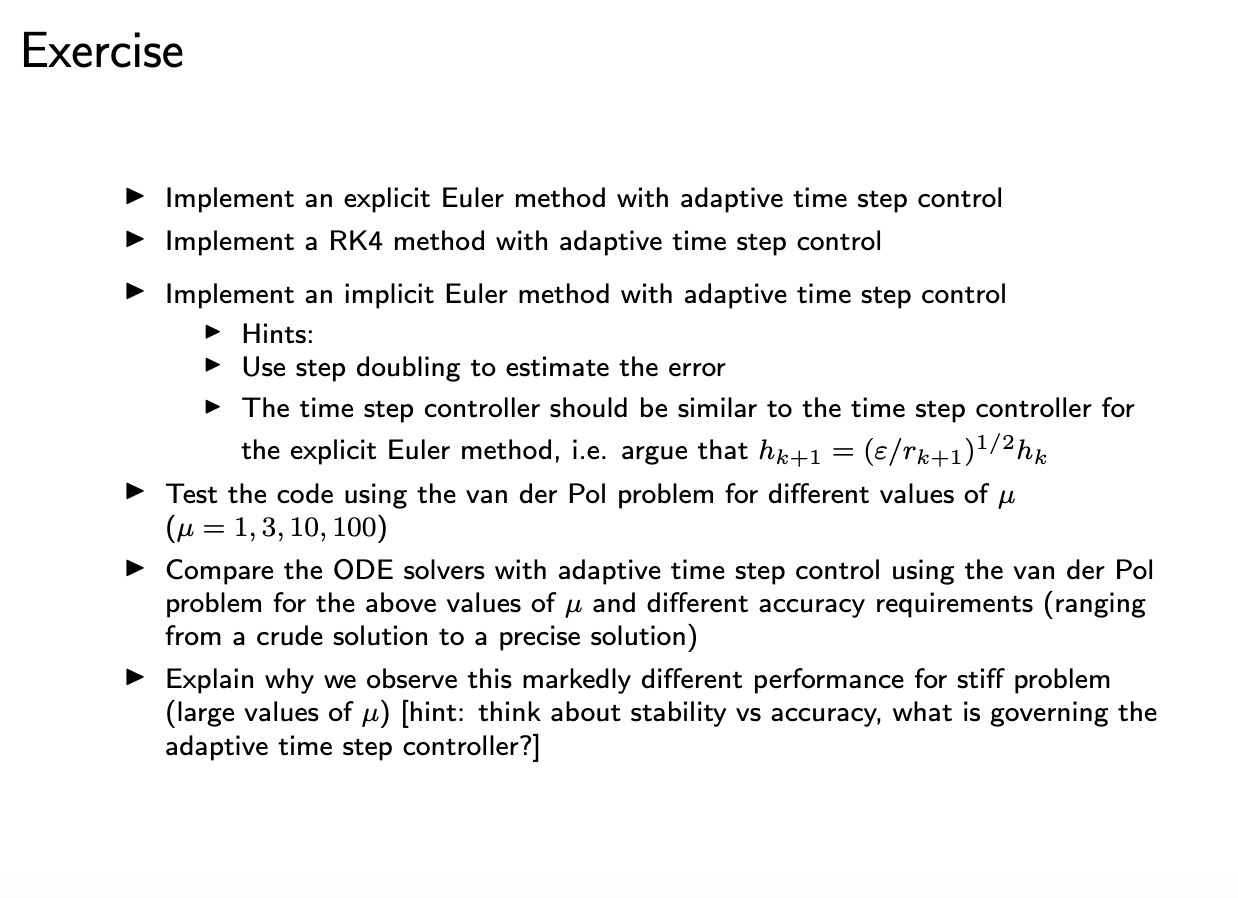

In [96]:
import numpy as np

In [97]:
def PipeAdvectionDiffusionReaction1(t,x,u,p):
    cA = x
    cAin = u 

    n = p[0]
    dz = p[1]

    v = p[2]
    DA = p[3]
    k = p[4]

    # convection at finite volume interfaces 
    NconvA = np.zeros(n+1,1)
    NconvA[1,1] = v * cAin; 
    NconvA[2:-1,1] = v * cA[1:n,1]; 

    # diffusion at finite volume interfaces 
    JA = np.zeros(n+1,1)
    JA[2:n,1] = (-DA/dz) * (cA[2:n,1]-cA[1:n-1,1])

    # flux = convection + diffusion 
    NA = NconvA + JA

    # reaction and production rates in finite volumes 

    r = k * cA
    RA = -r

    # Differential Equations (mass balances at finite volumes) 
    cAdot = (NA[2:n+1,1]-NA[1:n],1)/(-dz) + RA
    xdot = cAdot
    return xdot


## Explicit euler method with adaptive time step control

In [98]:

def adaptive_integrator(fun, t0, tN, N, x0, *args):
    

    return 


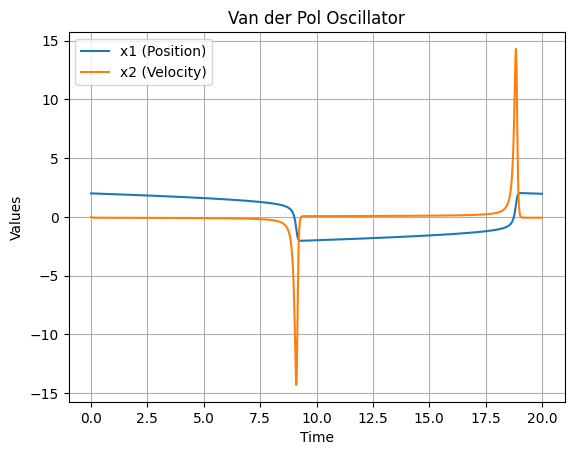

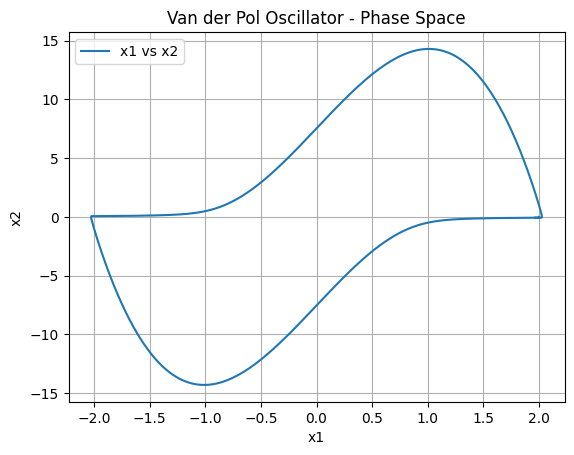

In [99]:
import numpy as np
import matplotlib.pyplot as plt


def explicit_euler_fixed_step_size(fun, t0, tN, N, x0, *args):
    dt = (tN - t0) / N
    nx = len(x0)

    X = np.zeros((N+1, nx))
    T = np.zeros(N+1)

    # Euler's Explicit Method
    T[0] = t0
    X[0, :] = x0

    for k in range(N):
        f = np.array(fun(T[k], X[k, :], *args))
        T[k+1] = T[k] + dt
        X[k+1, :] = X[k, :] + f * dt

    return T, X

def VanDerPol(t, x, mu):
    x1_ = x[1]
    x2_ = mu * (1 - x[0]**2) * x[1] - x[0]
    return [x1_, x2_]

mu = 10
x0 = np.array([2.0, 0.0])
t_span = (0, 20)
t0 = t_span[0]
TN = t_span[1]
N = 10000


# Solve the ODE
T, X = explicit_euler_fixed_step_size(VanDerPol, t0, TN, N, x0, mu)

# Plot the solution
plt.figure()
plt.plot(T, X[:, 0], label='x1 (Position)')
plt.plot(T, X[:, 1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Van der Pol Oscillator')
plt.grid()
plt.show()

plt.figure()
plt.plot(X[:, 0], X[:, 1], label='x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Phase Space')
plt.grid()
plt.show()


In [100]:
print(np.repeat(0.1,Nz))

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1]


In [101]:
# Parameters
Nz = 20
L=5
dz = L / Nz
v = 3
DA = 3 
k = 4
uk = 3
x0 = np.repeat(0.1,Nz)

# Solve the ODE
T, X = explicit_euler_fixed_step_size(PipeAdvectionDiffusionReaction1, t0, TN, N, x0, uk,[Nz, dz, v, DA, k])

# Plot the solution
plt.figure()
plt.plot(T, X[:, 0], label='x1 (Position)')
plt.plot(T, X[:, 1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Van der Pol Oscillator')
plt.grid()
plt.show()

plt.figure()
plt.plot(X[:, 0], X[:, 1], label='x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Phase Space')
plt.grid()
plt.show()

TypeError: Cannot interpret '1' as a data type

In [ ]:
test=np.array([True])
print(~test)

[False]


In [ ]:
import numpy as np


def ExplicitEulerAdaptiveStep(fun, tspan, x0, h0, abstol, reltol, *args):
    # Error controller parameters
    epstol = 0.8  # Safety factor
    facmin = 0.1  # Maximum decrease factor
    facmax = 5.0  # Maximum increase factor

    # Integration interval
    t0, tf = tspan

    # Initial conditions
    t = t0
    h = h0
    x = np.array(x0, dtype=float)  # Ensure x is a NumPy array

    # Counters
    nfun = 0
    naccept = 0
    nreject = 0

    # Output storage
    T = np.array([t])  # Ensure T is a 1D NumPy array
    X = np.array([x])  # Ensure X is a 2D NumPy array

    # Algorithm
    while t < tf:
        if t + h > tf:
            h = tf - t

        f = np.array(fun(t, x, *args), dtype=float)  # Ensure f is a NumPy array

        AcceptStep = False

        while not AcceptStep:
            x1 = x + h * f
            hm = 0.5 * h

            tm = t + hm
            xm = x + hm * f

            fm = np.array(fun(tm, xm, *args), dtype=float)  # Ensure fm is a NumPy array
            nfun += 3
            x1hat = xm + hm * fm

            # Error estimation
            e = x1hat - x1
            denom = np.maximum(abstol, np.abs(x1hat) * reltol)  # Fix element-wise max
            r = np.max(np.abs(e) / denom)  # Compute max ratio

            AcceptStep = r <= epstol

            if AcceptStep:
                t = t + h
                x = x1hat

                naccept += 1
                T = np.append(T, t)  # Append t to the 1D array
                X = np.vstack([X, x1hat.reshape(1, -1)])  # Ensure correct shape
            else:
                nreject += 1

            h = np.max([facmin, np.min([np.sqrt(epstol / r), facmax])]) * h

    return T, X


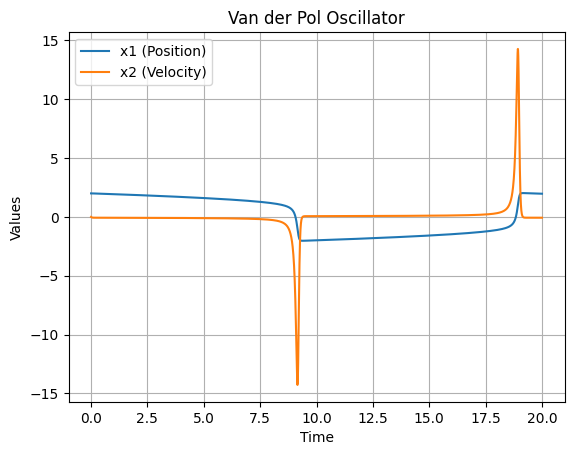

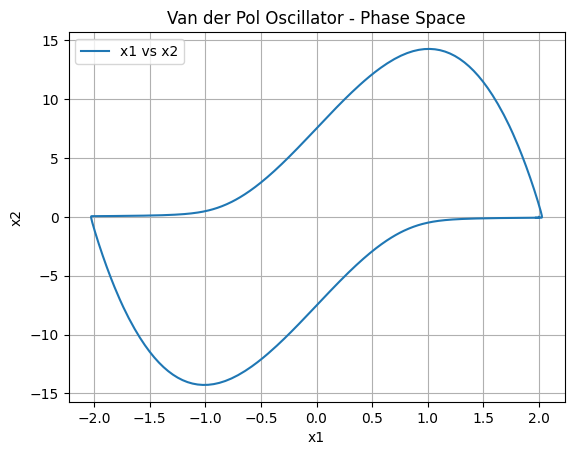

In [ ]:
reltol=1e-3
abstol=1e-8
h0=1e-6
tspan = (0, 20)


T, X = ExplicitEulerAdaptiveStep(VanDerPol,tspan,x0,h0,abstol,reltol,10)


# Plot the solution
plt.figure()
plt.plot(T, X[:, 0], label='x1 (Position)')
plt.plot(T, X[:, 1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Van der Pol Oscillator')
plt.grid()
plt.show()

plt.figure()
plt.plot(X[:, 0], X[:, 1], label='x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Phase Space')
plt.grid()
plt.show()

In [ ]:
# Solve the ODE
T, X = explicit_euler_fixed_step_size(VanDerPol, t0, TN, N, x0, mu)

## Classical Runge-Kutta methode with adaptive step size

In [140]:
def ClassicalRungeKuttaStep(fun,t,x,f,h,*args):
    #det er vores egen
    
    h2 = 0.5*h
    alpha = h/6
    beta = h/3 

    x = np.array(x, dtype=float)  # Ensure x is a NumPy array
    t = np.array(t, dtype=float)  # Ensure x is a NumPy array
    f = np.array(f, dtype=float)  # Ensure x is a NumPy array

    T1=t
    X1=x
    F1=f

    T2 = t+h2
    X2 = x+h2*F1
    F2 = np.array(fun(T2,X2,*args))
    
    T3=T2
    X3 = x+h*F2
    F3 = np.array(fun(T3, X3, *args))

    T4 = t+h
    X4 = x+h*F3
    F4 = np.array(fun(T4,X4,*args))

    t1 = T4
    x1 = x + alpha*(F1+F4)+beta*(F2+F3)

    return t1, x1


def ClassicalRungeKuttaAdaptiveStep(fun,tspan,x0,h0,abstol,reltol,*args):
    # Error controller parameters
    epstol = 0.8  # Safety factor
    facmin = 0.1  # Maximum decrease factor
    facmax = 5.0  # Maximum increase factor

    # Integration interval
    t0, tf = tspan

    # Initial conditions
    t = t0
    h = h0
    x = np.array(x0, dtype=float)  # Ensure x is a NumPy array
    print("first time it")
    # Counters
    nfun = 0
    naccept = 0
    nreject = 0
    
    # Output storage
    T = np.array([t])  # Ensure T is a 1D NumPy array
    X = np.array([x])  # Ensure X is a 2D NumPy array



    while t < tf:

        if (t+h > tf):
            h = tf-t

        f = fun(t,x,*args)

        AcceptStep = False

        while not AcceptStep:

            t1,x1 = ClassicalRungeKuttaStep(fun,t,x,f,h,*args)

            hm = 0.5*h
            
            tm,xm = ClassicalRungeKuttaStep(fun,t,x,f,hm,*args)


            fm = fun(tm,xm,*args)
            

            t1hat,x1hat = ClassicalRungeKuttaStep(fun,tm,xm,fm,hm,*args)

            nfun+=12

            e = x1hat -x1

            denom = np.maximum(abstol, np.abs(x1hat) * reltol)  # Fix element-wise max
            r = np.max(np.abs(e) / denom)  # Compute max ratio


            AcceptStep = (r <= epstol)

            if AcceptStep:
                t = t + h
                x = x1hat
                naccept+=1
                
                T = np.append(T, t)  # Append t to the 1D array
                X = np.vstack([X, x1hat.reshape(1, -1)])  # Ensure correct shape
            else: 
                nreject+=1

            
            h = np.max([facmin, np.min([np.sqrt(epstol / r), facmax])]) * h



    return (T,X)

    

first time it


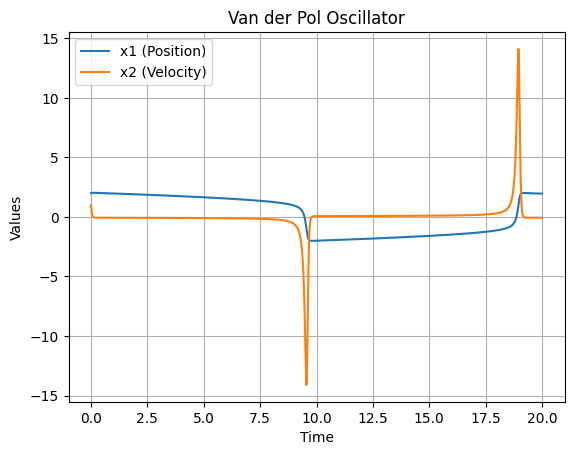

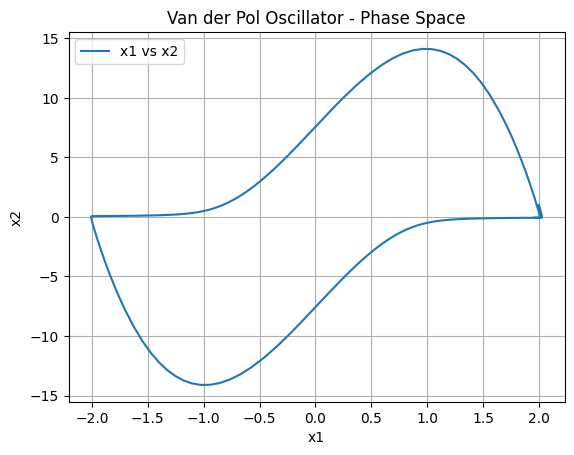

In [141]:
reltol=1e-3
abstol=1e-3
h0=1e-6
tspan = (0, 20)
x0=np.array([2.0,1.0])


T, X = ClassicalRungeKuttaAdaptiveStep(VanDerPol,tspan,x0,h0,abstol,reltol,10)


# Plot the solution
plt.figure()
plt.plot(T, X[:, 0], label='x1 (Position)')
plt.plot(T, X[:, 1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Van der Pol Oscillator')
plt.grid()
plt.show()

plt.figure()
plt.plot(X[:, 0], X[:, 1], label='x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Phase Space')
plt.grid()
plt.show()

NameError: name 'dt' is not defined